# **Indian House Prediciton**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier # Accuracy 100%
from sklearn.linear_model import LogisticRegression # Accuracy 99.17%
from sklearn.tree import DecisionTreeClassifier # Accuracy 100%
from sklearn.neighbors import KNeighborsClassifier # Accuracy 98.56%


import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/House Price India.csv')

In [ ]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [ ]:
# Generate summary statistics of the numerical data in the DataFrame
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,8.999000e+03,8999.000000,8999.000000,8999.000000,8999.000000,8.999000e+03,8999.000000,8999.000000,8999.000000,8999.000000,...,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8.999000e+03
mean,6.762821e+09,42559.149794,3.388154,2.145627,2113.764307,1.505514e+04,1.507001,0.006890,0.236582,3.444716,...,1971.282809,91.841982,122032.832204,52.795394,-114.401024,2016.772641,12796.672186,2.013335,64.891877,5.457997e+05
std,6.212107e+03,38.155043,0.952948,0.767306,928.619074,3.748185e+04,0.539716,0.082722,0.769307,0.667594,...,29.432291,418.263545,19.081407,0.135072,0.142963,699.458664,24967.418999,0.815798,8.919198,3.602345e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.705000,460.000000,659.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42529.000000,3.000000,1.750000,1450.000000,5.028000e+03,1.000000,0.000000,0.000000,3.000000,...,1952.000000,0.000000,122016.000000,52.712150,-114.518000,1500.000000,5100.000000,1.000000,57.000000,3.275000e+05
50%,6.762821e+09,42559.000000,3.000000,2.250000,1960.000000,7.695000e+03,1.500000,0.000000,0.000000,3.000000,...,1976.000000,0.000000,122031.000000,52.808500,-114.417000,1870.000000,7682.000000,2.000000,65.000000,4.590000e+05
75%,6.762826e+09,42592.000000,4.000000,2.500000,2595.000000,1.093000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.310000,2410.000000,10278.500000,3.000000,73.000000,6.527500e+05
max,6.762832e+09,42628.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007200,-113.505000,5790.000000,434728.000000,3.000000,80.000000,7.060000e+06


In [ ]:
# Display a concise summary of the DataFrame, including the data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     8999 non-null   int64  
 1   Date                                   8999 non-null   int64  
 2   number of bedrooms                     8999 non-null   int64  
 3   number of bathrooms                    8999 non-null   float64
 4   living area                            8999 non-null   int64  
 5   lot area                               8999 non-null   int64  
 6   number of floors                       8999 non-null   float64
 7   waterfront present                     8999 non-null   int64  
 8   number of views                        8999 non-null   int64  
 9   condition of the house                 8999 non-null   int64  
 10  grade of the house                     8999 non-null   int64  
 11  Area

In [ ]:
# Select all rows and all columns of the DataFrame using label-based indexing
df.loc[:,:]

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,6762827786,42628,3,1.50,1380,12196,1.0,0,0,4,...,1967,0,122040,52.5504,-114.512,1600,10720,1,68,285000
8995,6762827954,42628,6,3.00,2400,9373,2.0,0,0,3,...,1991,0,122072,52.5562,-114.404,2060,7316,3,70,280000
8996,6762828062,42628,4,2.50,2040,8076,2.0,0,0,3,...,1994,0,122035,52.5991,-114.264,2040,8408,3,60,279000
8997,6762828326,42628,3,1.75,1540,12600,1.0,0,0,4,...,1980,0,122024,52.5924,-114.221,1540,11656,2,62,272500


In [ ]:
# Get a list of column names in the DataFrame
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
# Looking for null values
df.isnull().sum()

,0
id,0
Date,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0


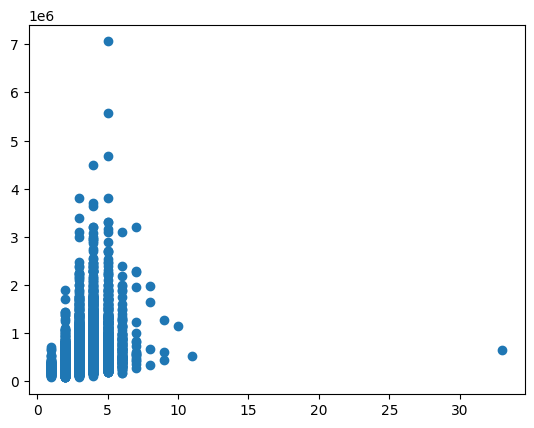

In [ ]:
plt.scatter(x='number of bedrooms', y='Price', data=df)

In [ ]:
df[df['number of bedrooms']>30]

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
3531,6762815473,42545,33,1.75,1620,6000,1.0,0,0,5,...,1947,0,122028,52.9178,-114.521,1330,4700,2,50,640000


<Axes: ylabel='Frequency'>

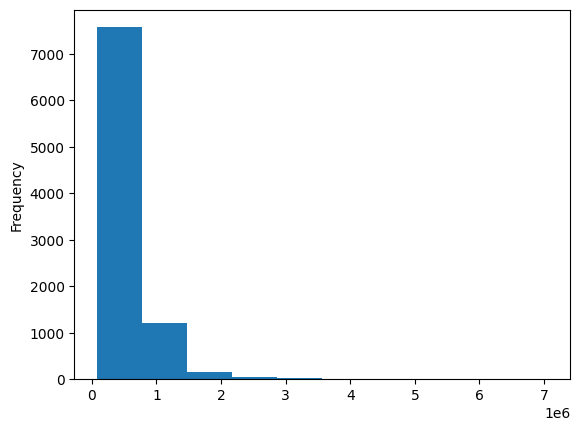

In [ ]:
df['Price'].plot(kind='hist')

<Axes: >

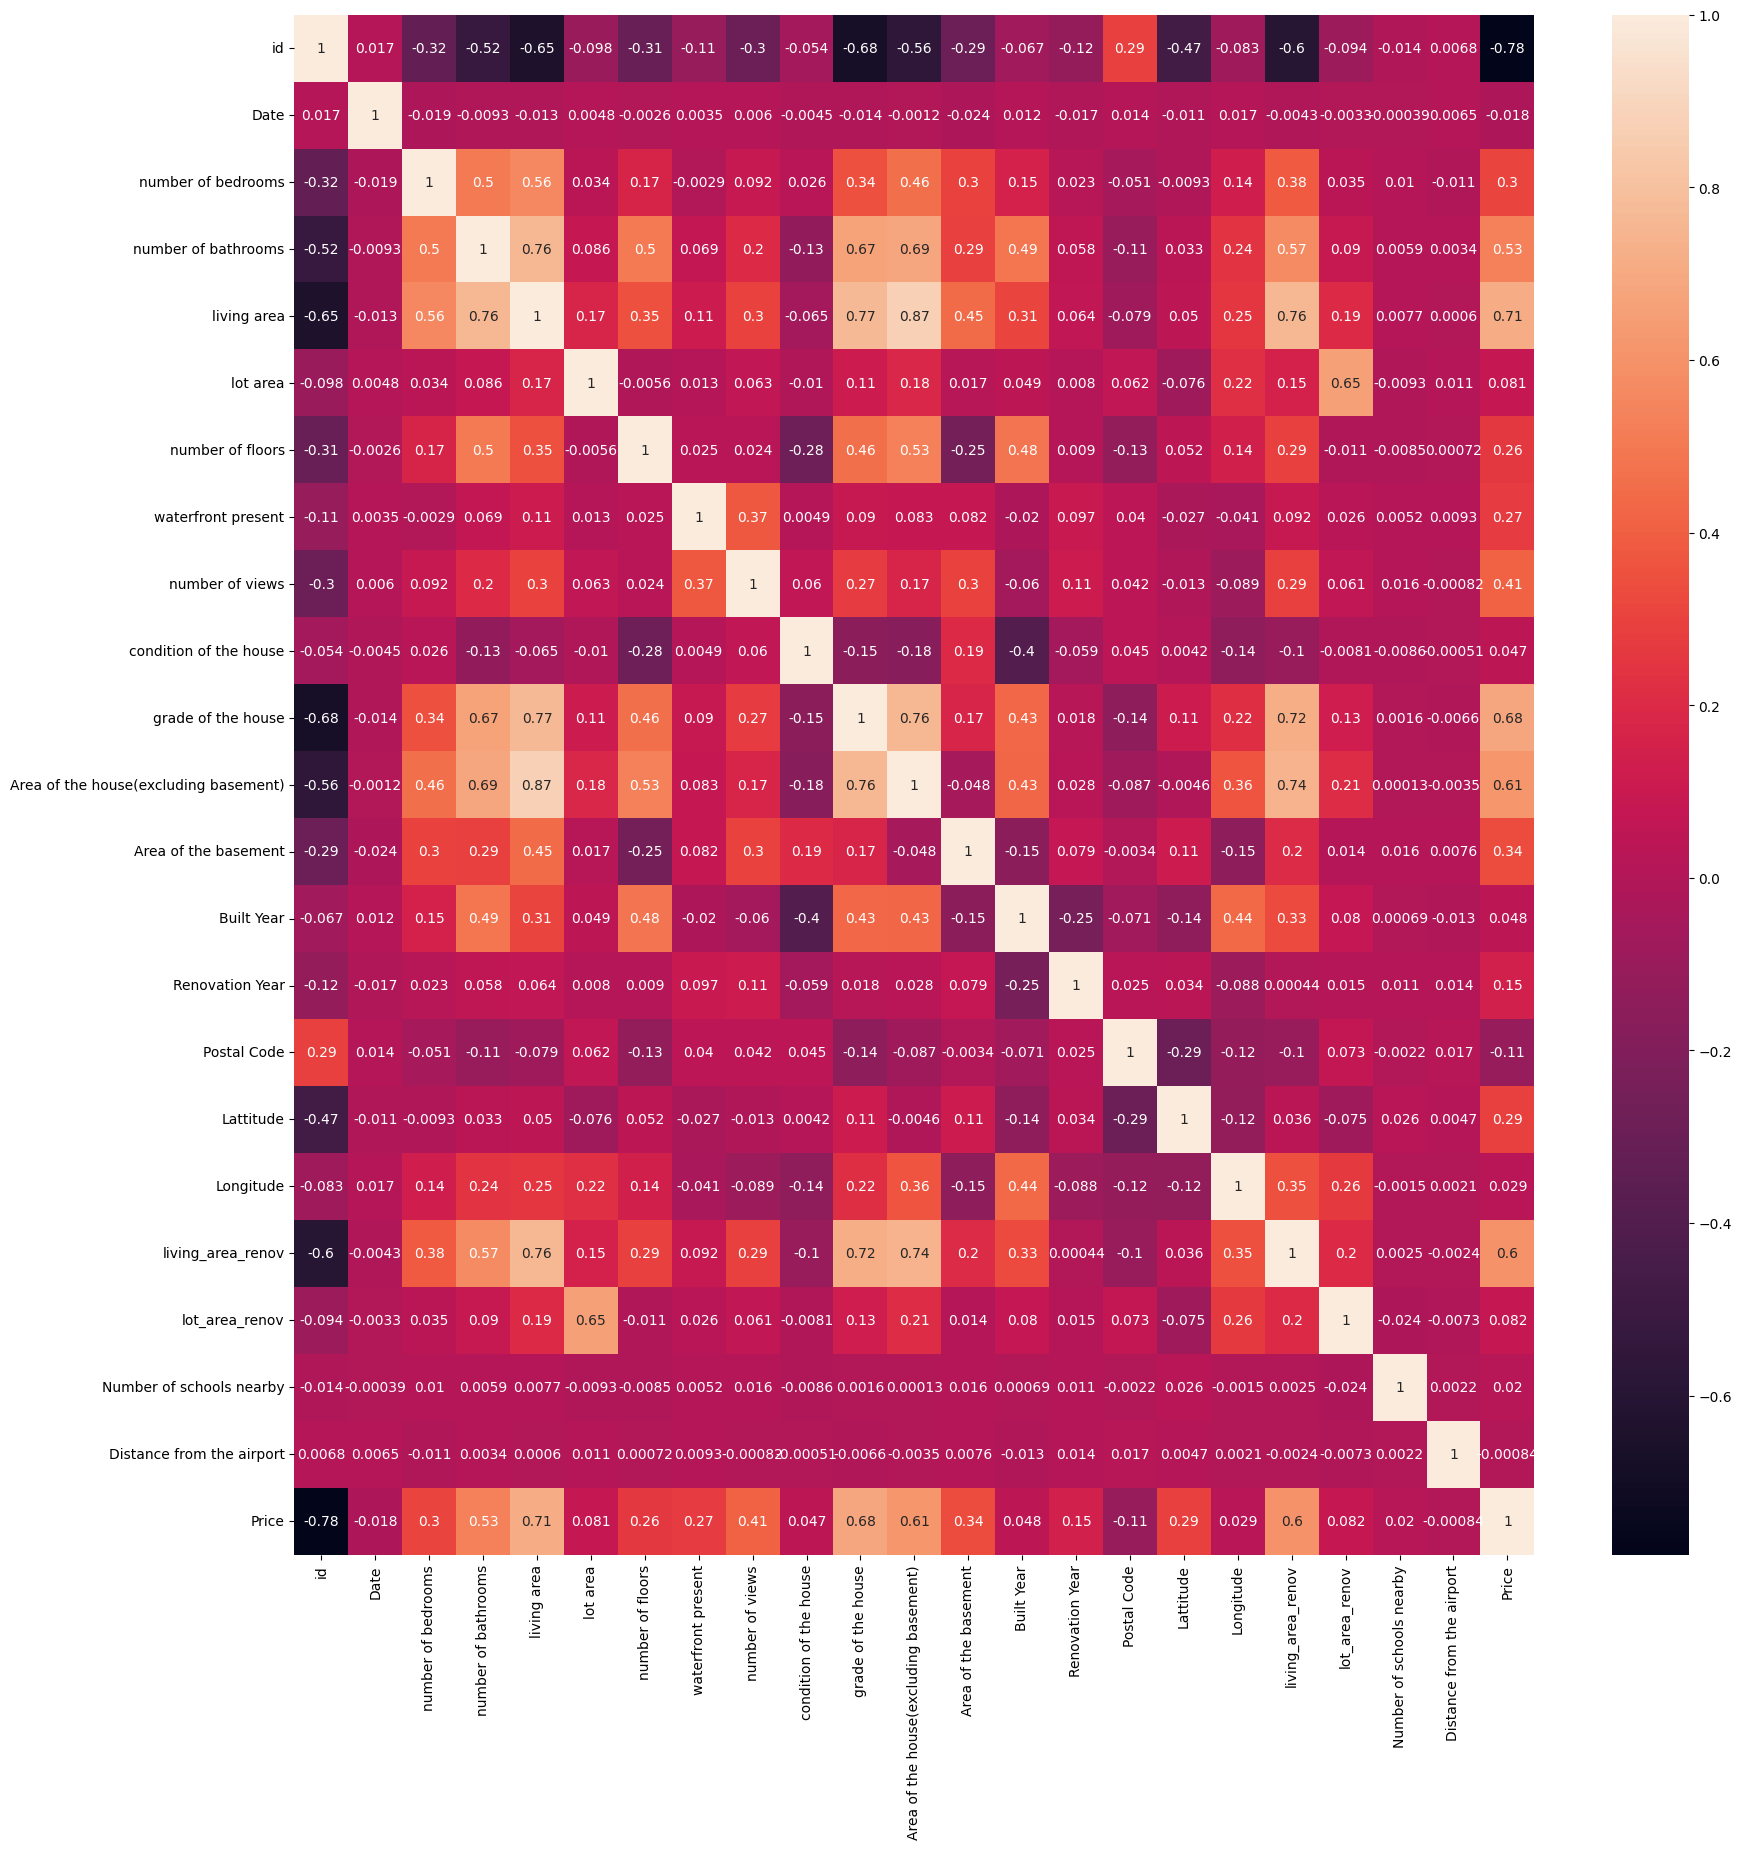

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

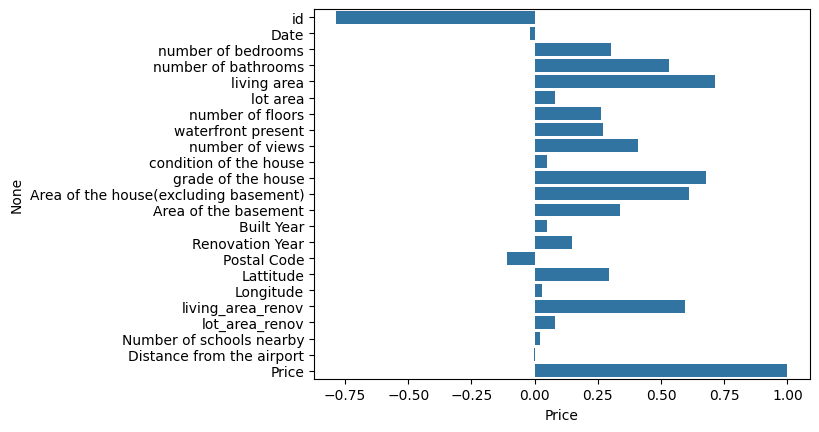

In [ ]:
df_corr = df.corr()['Price']

#plt.figure(figsize=(20,6))
sns.barplot(x=df_corr, y=df_corr.index)
plt.show()

In [ ]:
features = df_corr[df_corr > 0.01].drop('Price').index
list(features)

['number of bedrooms',
 'number of bathrooms',
 'living area',
 'lot area',
 'number of floors',
 'waterfront present',
 'number of views',
 'condition of the house',
 'grade of the house',
 'Area of the house(excluding basement)',
 'Area of the basement',
 'Built Year',
 'Renovation Year',
 'Lattitude',
 'Longitude',
 'living_area_renov',
 'lot_area_renov',
 'Number of schools nearby']

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
waterfront present,0.620526
number of views,0.111976
Price,0.042429
id,0.024264
Area of the house(excluding basement),0.023594
lot_area_renov,0.020854
Lattitude,0.019251
Longitude,0.019052
living area,0.015639
Area of the basement,0.013012


# **1. Random Forest Classifier**

In [ ]:
# Slicing data
X = df.drop(['condition of the house'], axis=1)
y = df['waterfront present']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(f"Shape train features :{X_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{X_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(7199, 22)
Shape train labels :(7199,)
Shape test features :(1800, 22)
Shape test labels :(1800,)


In [ ]:
rfc = RandomForestClassifier(criterion='gini',random_state=45,n_estimators=50,max_depth=7)
rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rfc.predict(X_test)

In [ ]:
#Let check the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = rfc.predict(X_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = rfc.predict(X_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


# **2 . Logistic Regression**

In [ ]:
# Slicing data
X1 = df.drop(['condition of the house'], axis=1)
y1 = df['waterfront present']

In [ ]:
print(y1.unique())

[0 1]


In [ ]:
# Create a new target variable with 3 categories
y1_cat = pd.cut(y1, 3, labels=["Low", "Medium", "High"])

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1_cat, test_size=0.2, random_state=42)

# Create a LogisticRegression model
logr = LogisticRegression()

# Fit the model to the training data
logr.fit(X1_train, y1_train)

LogisticRegression()

In [ ]:
# Prediction result
y1_pred_test = logr.predict(X1_test)

In [ ]:
print('Confusion Matrix \n', confusion_matrix(y1_test, y1_pred_test))
print('Classification Report \n',classification_report(y1_test, y1_pred_test))
print('Accuracy : ',accuracy_score(y1_test, y1_pred_test)*100,'%')

Confusion Matrix 
 [[   1   10]
 [   0 1789]]
Classification Report 
               precision    recall  f1-score   support

        High       1.00      0.09      0.17        11
         Low       0.99      1.00      1.00      1789

    accuracy                           0.99      1800
   macro avg       1.00      0.55      0.58      1800
weighted avg       0.99      0.99      0.99      1800

Accuracy :  99.44444444444444 %


# **3. Decision Tree Classifier**

In [ ]:
# Slicing data
# declare feature vector and target variable
x2 = df.drop(['condition of the house'], axis=1)
y2 = df['waterfront present']
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state= 42)

In [ ]:
# Instantiate the DecisionTreeClassifier model
dtc = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42)
dtc.fit(x2_train,y2_train)
#Predict the response for test dataset
y2_pred = dtc.predict(x2_test)
# Predict the response for training dataset
y2_train_predict = dtc.predict(x2_train)
y2_test_predict = dtc.predict(x2_test)
dtc

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:


#Let check the accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

# Train accuracy
y_train_predict = dtc.predict(x2_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y2_train,y2_train_predict)*100))

# Test accuracy
y_test_predict = dtc.predict(x2_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y2_test,y2_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


In [ ]:
print('Precision, Recall and f1-score : \n',classification_report(y2_test,y2_pred))
print('Confusion Matrix : \n',confusion_matrix(y2_test,y2_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1789
           1       1.00      1.00      1.00        11

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Confusion Matrix : 
 [[1789    0]
 [   0   11]]


# **Visualizing alpha w.r.t impurity of leaves**

In [ ]:
path = dtc.cost_complexity_pruning_path(x2_train, y2_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

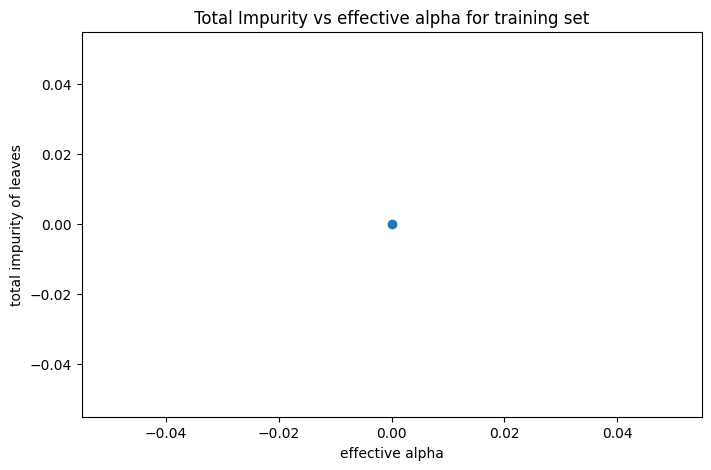

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42, ccp_alpha=ccp_alpha)
  clf.fit(x2_train, y2_train)
  clfs.append(clf)
  print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.0140682594303152
Number of nodes in the last tree is: 1 with ccp_alpha: 0.0140682594303152


In [ ]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42,ccp_alpha=0.016)
clf.fit(x2_train,y2_train)

DecisionTreeClassifier(ccp_alpha=0.016, max_depth=7, random_state=42)

# **4. K-Neighbour Classifier**

In [ ]:
# Slicing data
X3 = df.drop(['condition of the house'], axis=1)
y3 = df['waterfront present']

In [ ]:





# Split the dataset into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=40)

# Initialize the KNeighborsClassifier with the specified parameters
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski', n_jobs=-1, n_neighbors=1, p=2, weights='uniform')

# Fit the classifier to the training data
knn.fit(X3_train, y3_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=1)

In [ ]:

pred3 = knn.predict(X3_test)
print(pred3)

[0 0 0 ... 0 0 0]


In [ ]:


print('Confusion Matrix \n', confusion_matrix(y3_test,pred3))
print('Classification Report \n',classification_report(y3_test,pred3))
print('Accuracy : ',accuracy_score(y3_test, pred3)*100,'%')

Confusion Matrix 
 [[1778    6]
 [  16    0]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1784
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1800
   macro avg       0.50      0.50      0.50      1800
weighted avg       0.98      0.99      0.99      1800

Accuracy :  98.77777777777777 %


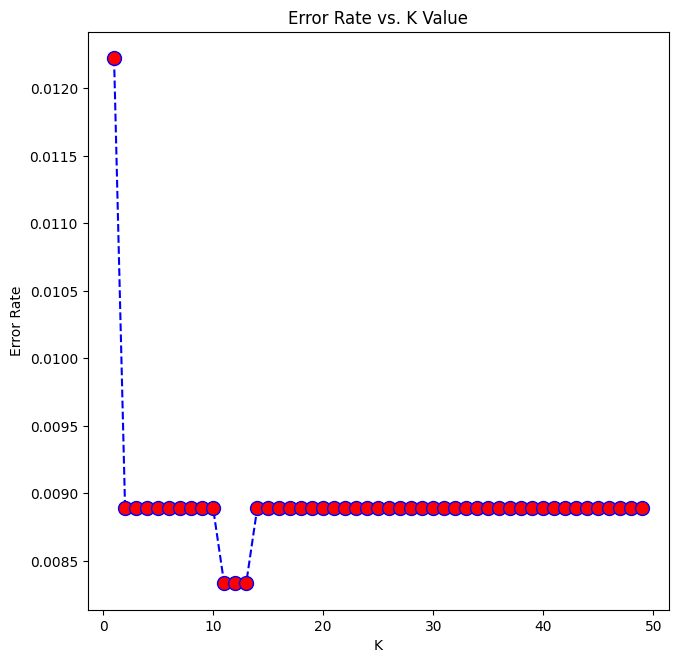

In [ ]:
# Will take some time
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X3_train, y3_train)
    pred_i = knn.predict(X3_test)
    error_rate.append(np.mean(pred_i != y3_test))

# Plot the error rate vs. K value
plt.figure(figsize=(7.5,7.5))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:

# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X3_train,y3_train)
pred = knn.predict(X3_test)
print('WITH K=10')
print('\n')
print(confusion_matrix(y3_test,pred3))
print('\n')
print(classification_report(y3_test,pred3))
print('Accuracy : ',accuracy_score(y3_test, pred3)*100,'%')

WITH K=10


[[1778    6]
 [  16    0]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1784
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1800
   macro avg       0.50      0.50      0.50      1800
weighted avg       0.98      0.99      0.99      1800

Accuracy :  98.77777777777777 %
